# Project: Restaurant Revenue Prediction

This project utilizes the knowledge of machine learning to predict a numeric target variable. To achieve this prediction, various regression algorithms, including Linear Regression (OLS), Ridge Regression, Lasso Regression, Ramdom Forest Regressor, and Gradient Boosting Regressor, are applied to develop predictive models.    

The workflow of the project is structured into 6 steps as follows:
1. Project Scoping
2. Data Gathering
3. Data Cleaning
4. Exploratory Data Analysis (EDA)
5. Model Development and Evaluation
6. Conclusion

## 1. Project Scoping

The main objectives of the project are as follows:
1. Find the most powerful predictive model in terms of R-squared, MAE, and RMSE.
2. Understand the impact that variables have on predictions.

## 2. Data Gathering
The data being used in this project is a public dataset collected from Kaggle and has been input into this project by using pd.read_csv function. After that, the data structure and summary statistics were initially explored.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
restaurant = pd.read_csv("restaurant_data.csv")

### Data Dictionary
Columns  
1. Name: The name of the restaurant.  
2. Location: The location of the restaurant (e.g., Rural, Downtown).  
3. Cuisine: The type of cuisine offered (e.g., Japanese, Mexican, Italian).  
4. Rating: The average rating of the restaurant.  
5. Seating Capacity: The number of seats available in the restaurant.  
6. Average Meal Price: The average price of a meal at the restaurant.  
7. Marketing Budget: The marketing budget allocated for the restaurant.  
8. Social Media Followers: The number of social media followers.  
9. Chef Experience Years: The number of years of experience of the head chef.  
10. Number of Reviews: The total number of reviews the restaurant has received.  
11. Avg Review Length: The average length of reviews.  
12. Ambience Score: A score representing the ambience of the restaurant.  
13. Service Quality Score: A score representing the quality of service.  
14. Parking Availability: Indicates if parking is available (Yes/No).  
15. Weekend Reservations: The number of reservations made on weekends.  
16. Weekday Reservations: The number of reservations made on weekdays.  
17. Revenue: The total revenue generated by the restaurant.

In [5]:
restaurant.head()

Name  Location   Cuisine  Rating  Seating Capacity  \
0  Restaurant 0     Rural  Japanese     4.0                38   
1  Restaurant 1  Downtown   Mexican     3.2                76   
2  Restaurant 2     Rural   Italian     4.7                48   
3  Restaurant 3     Rural   Italian     4.4                34   
4  Restaurant 4  Downtown  Japanese     4.9                88   

   Average Meal Price  Marketing Budget  Social Media Followers  \
0               73.98              2224                   23406   
1               28.11              4416                   42741   
2               48.29              2796                   37285   
3               51.55              1167                   15214   
4               75.98              3639                   40171   

   Chef Experience Years  Number of Reviews  Avg Review Length  \
0                     13                185         161.924906   
1                      8                533         148.759717   
2                     18                853          56.849189   
3                     13                 82         205.433265   
4                      9                 78         241.681584   

   Ambience Score  Service Quality Score Parking Availability  \
0             1.3                    7.0                  Yes   
1             2.6                    3.4                  Yes   
2             5.3                    6.7                   No   
3             4.6                    2.8                  Yes   
4             8.6                    2.1                   No   

   Weekend Reservations  Weekday Reservations     Revenue  
0                    13                     4   638945.52  
1                    48                     6   490207.83  
2                    27                    14   541368.62  
3                     9                    17   404556.80  
4                    37                    26  1491046.35

In [6]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [7]:
restaurant.describe()

Rating  Seating Capacity  Average Meal Price  Marketing Budget  \
count  8368.000000       8368.000000         8368.000000       8368.000000   
mean      4.008258         60.212835           47.896659       3218.254900   
std       0.581474         17.399488           14.336767       1824.896053   
min       3.000000         30.000000           25.000000        604.000000   
25%       3.500000         45.000000           35.490000       1889.000000   
50%       4.000000         60.000000           45.535000       2846.500000   
75%       4.500000         75.000000           60.300000       4008.500000   
max       5.000000         90.000000           76.000000       9978.000000   

       Social Media Followers  Chef Experience Years  Number of Reviews  \
count             8368.000000            8368.000000        8368.000000   
mean             36190.621773              10.051984         523.010397   
std              18630.153330               5.516606         277.215127   
min               5277.000000               1.000000          50.000000   
25%              22592.500000               5.000000         277.000000   
50%              32518.500000              10.000000         528.000000   
75%              44566.250000              15.000000         764.250000   
max             103777.000000              19.000000         999.000000   

       Avg Review Length  Ambience Score  Service Quality Score  \
count        8368.000000     8368.000000            8368.000000   
mean          174.769974        5.521283               5.508772   
std            71.998060        2.575442               2.586552   
min            50.011717        1.000000               1.000000   
25%           113.311102        3.300000               3.200000   
50%           173.910079        5.500000               5.600000   
75%           237.406885        7.800000               7.800000   
max           299.984924       10.000000              10.000000   

       Weekend Reservations  Weekday Reservations       Revenue  
count           8368.000000           8368.000000  8.368000e+03  
mean              29.491754             29.235301  6.560706e+05  
std               20.025415             20.004277  2.674137e+05  
min                0.000000              0.000000  1.847085e+05  
25%               13.000000             13.000000  4.546514e+05  
50%               27.000000             26.000000  6.042421e+05  
75%               43.000000             43.000000  8.130942e+05  
max               88.000000             88.000000  1.531868e+06

## 3. Data Cleaning

In [8]:
restaurant.isna().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

After running the code snippet for checking null values, there is no missing value in each column. This means the dataset is already clean and ready for performing an analysis.

## 4. Exploratory Data Analysis (EDA)

### 4.1 Explore the Target

Text(0.5, 1.0, 'Boxplot of Revenue')

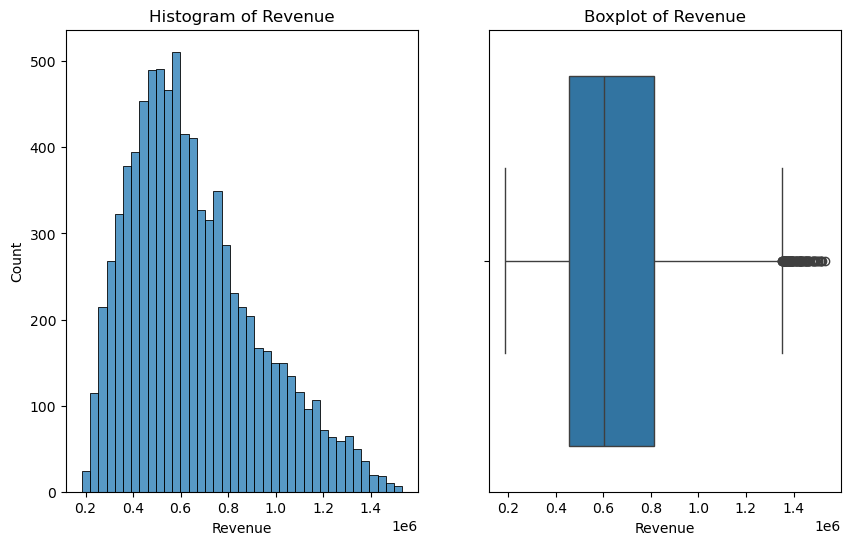

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    
sns.histplot(restaurant["Revenue"], ax=ax[0])
ax[0].set_title("Histogram of Revenue")
ax[0].set_xlabel("Revenue")
ax[0].set_ylabel("Count")
    
sns.boxplot(x = restaurant["Revenue"], ax=ax[1])
ax[1].set_title("Boxplot of Revenue")   

Judging from the charts, it can be concluded that the mean of the revenue is higher than the median. When it comes to the boxplot, there are some outliers which contribute to the positive skewness. This indicates that some restaurants may generate outstanding revenue while 50% of restaurants generate revenue between 400,000 to 800,000. This should be further investigated.

### 4.2 Explore the Features

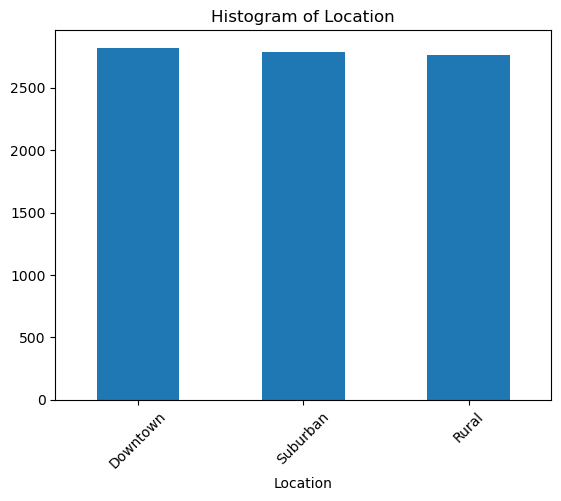

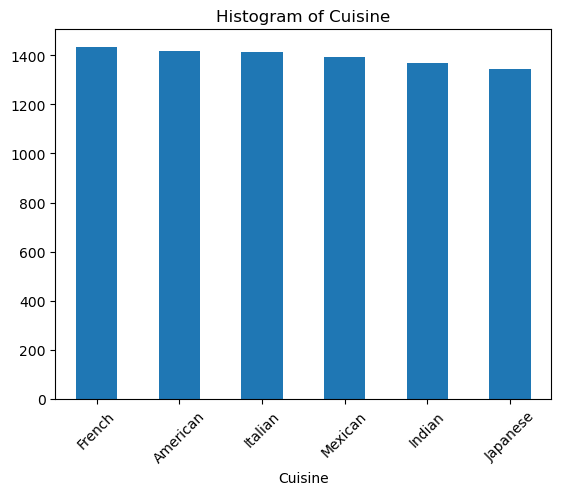

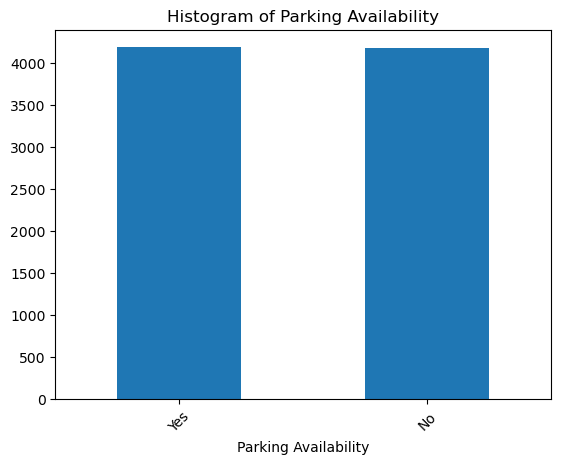

In [14]:
# Exploring object features
for column in restaurant.drop("Name", axis = 1).select_dtypes("object").columns:
    restaurant[column].value_counts().plot.bar()
    plt.title(f"Histogram of {column}")
    plt.xticks(rotation=45)
    plt.show()

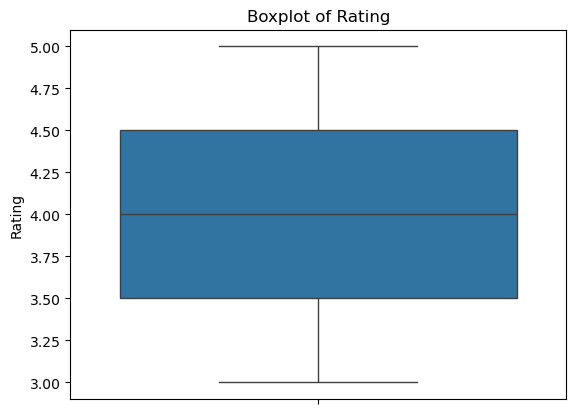

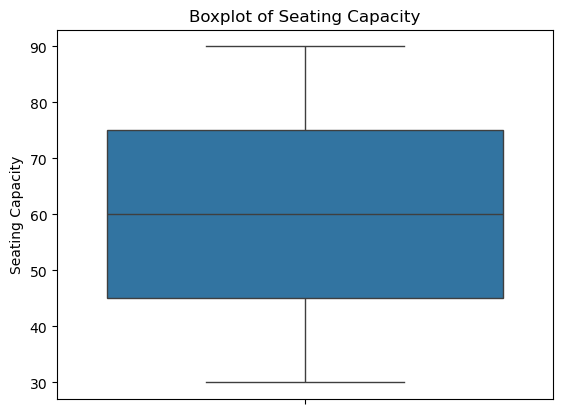

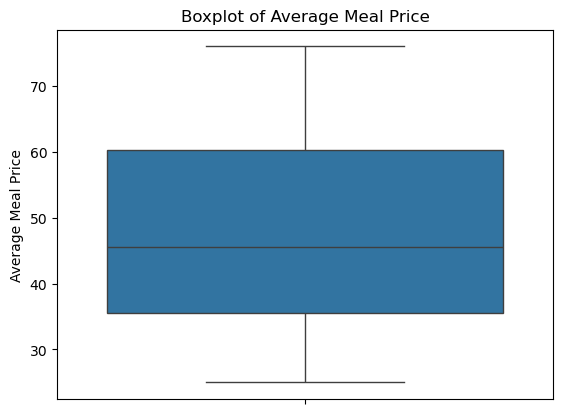

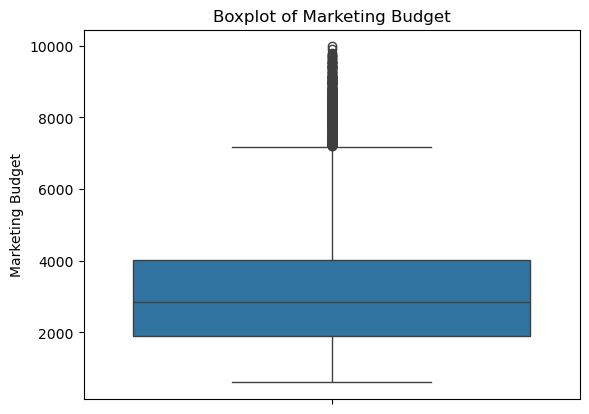

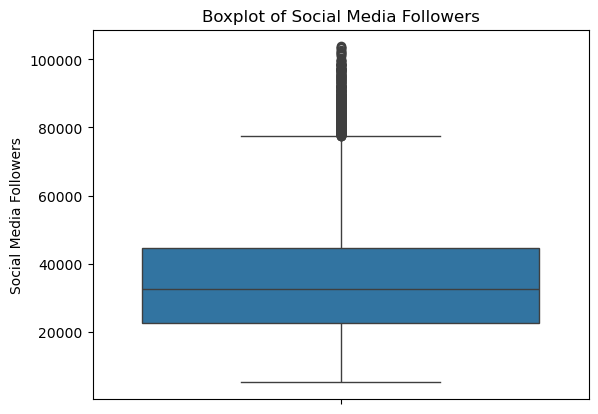

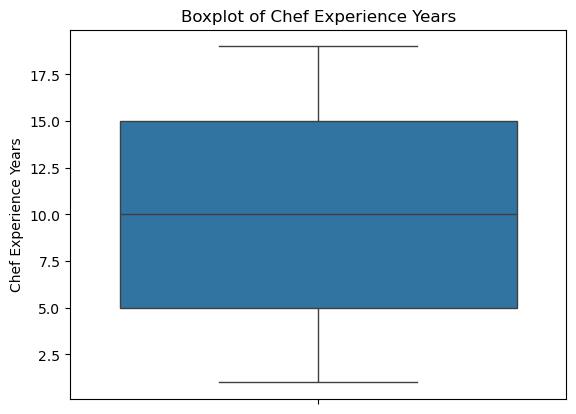

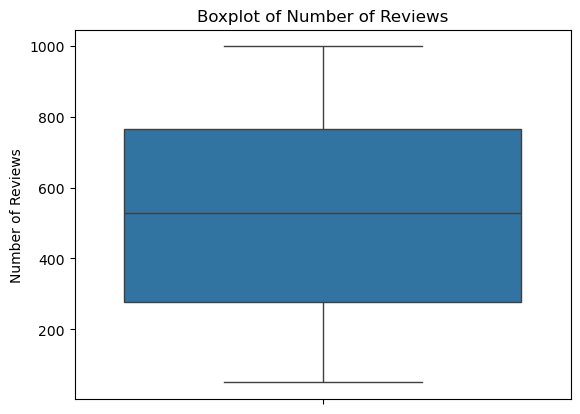

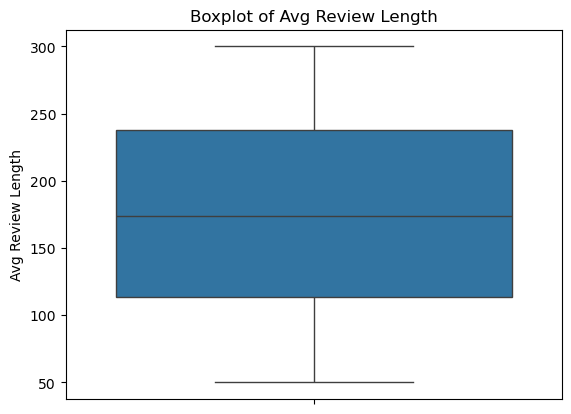

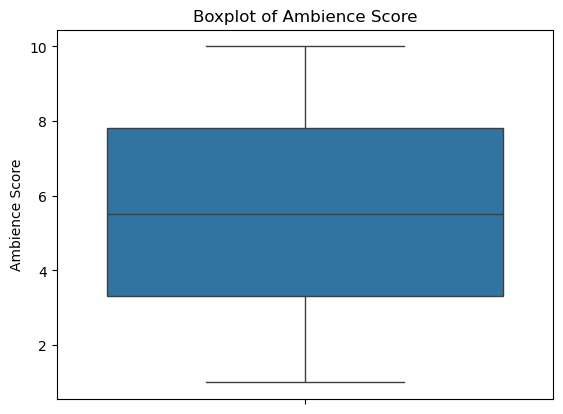

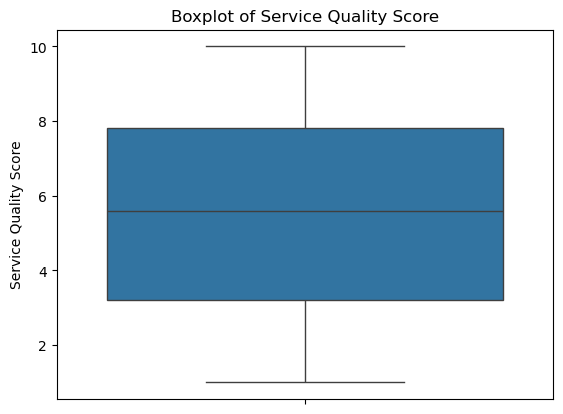

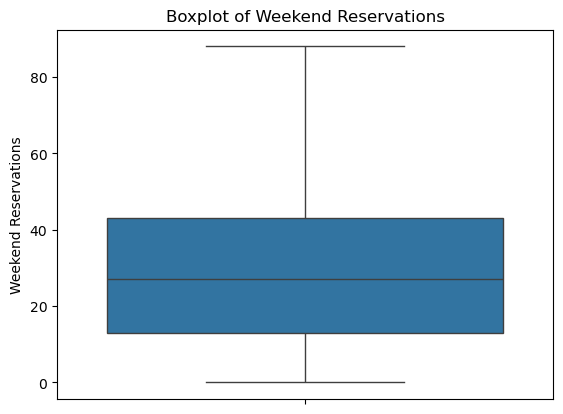

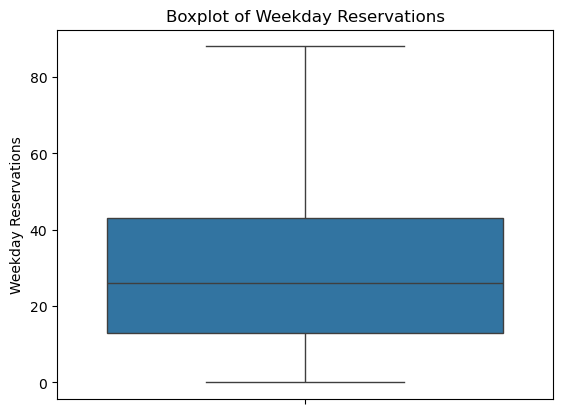

In [15]:
# Exploring numeric features

for column in restaurant.drop("Revenue", axis = 1).select_dtypes("number").columns:
    sns.boxplot(restaurant[column]).set(ylabel=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

### 4.3 Explore the Relationship between Features and Target

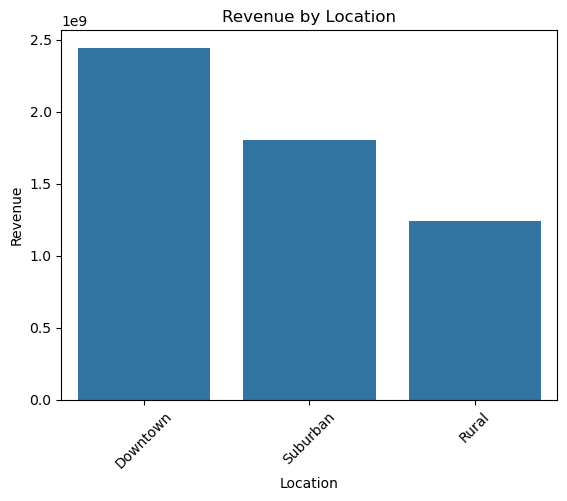

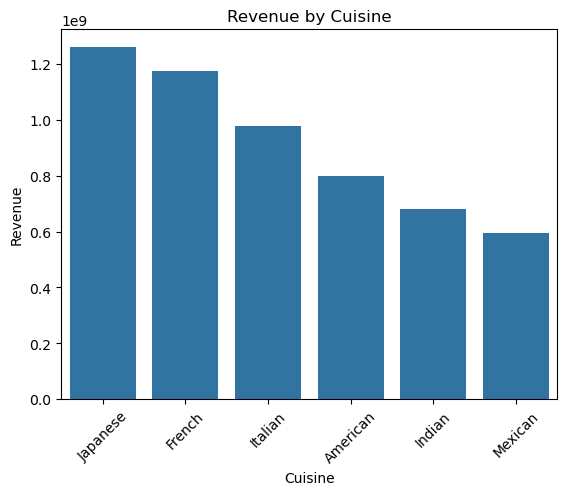

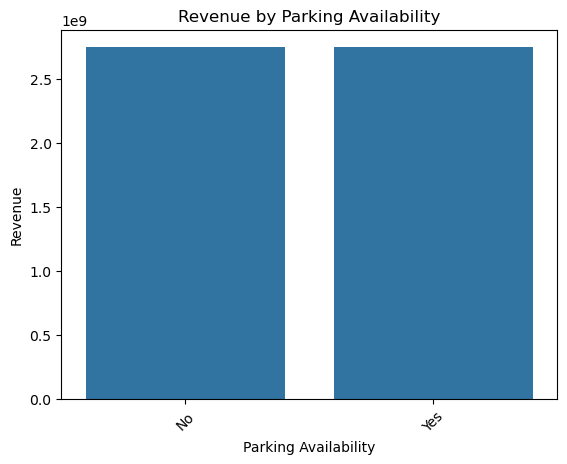

In [17]:
#Exploring the relationship between the object features and the target

for column in restaurant.drop("Name", axis = 1).select_dtypes("object").columns:
    restaurant_object = restaurant.groupby(column).sum().sort_values("Revenue", ascending=False)
    sns.barplot(restaurant_object, x = column, y = "Revenue").set(ylabel="Revenue")
    plt.title(f"Revenue by {column}")
    plt.xticks(rotation=45)
    plt.show()

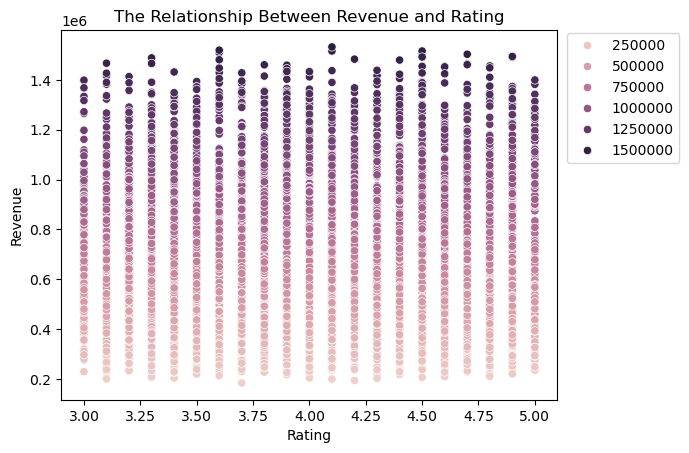

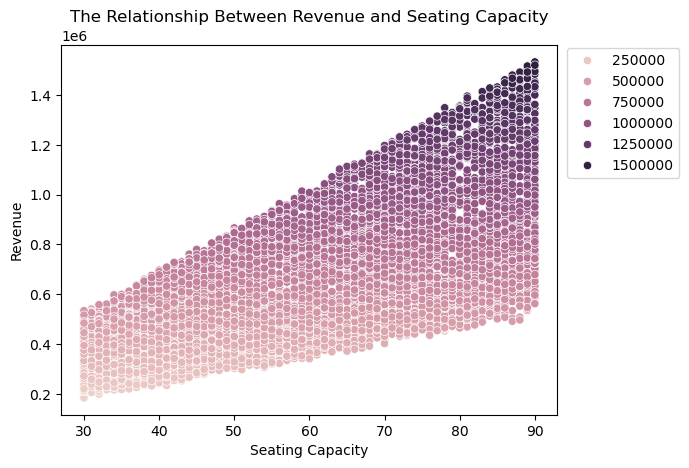

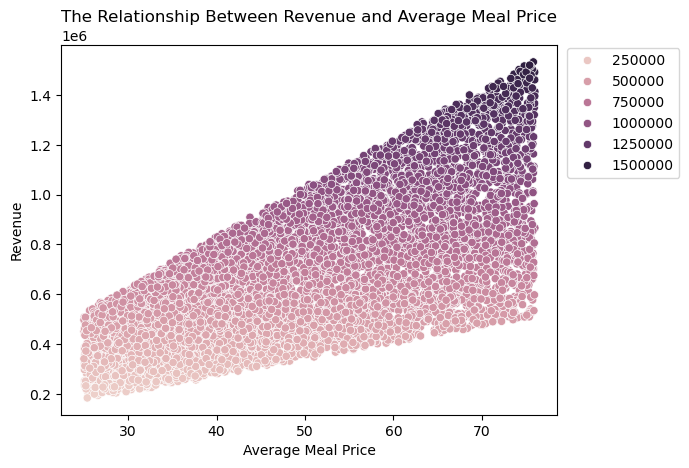

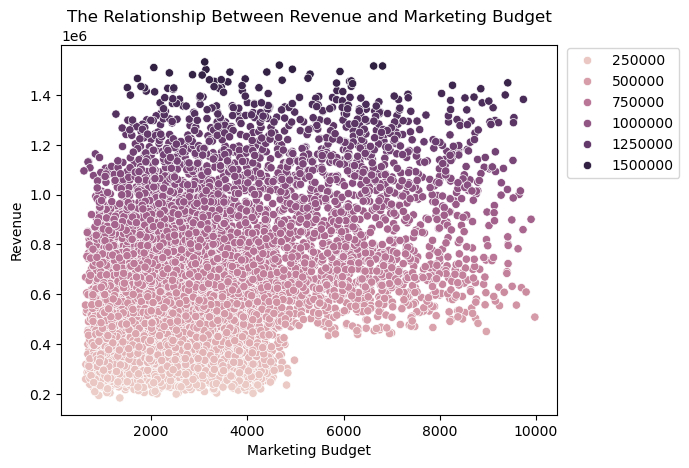

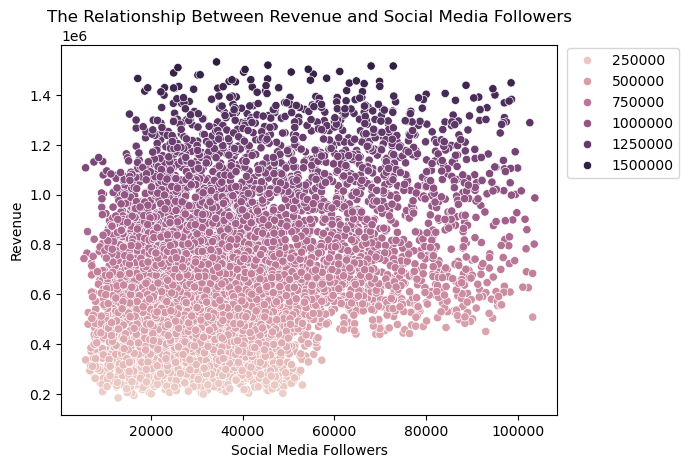

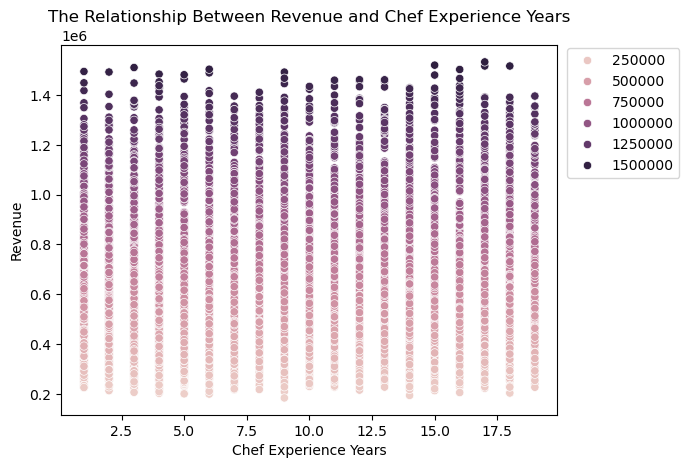

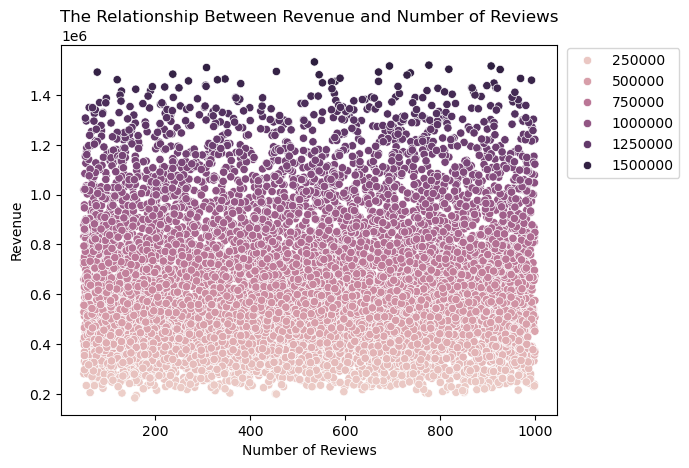

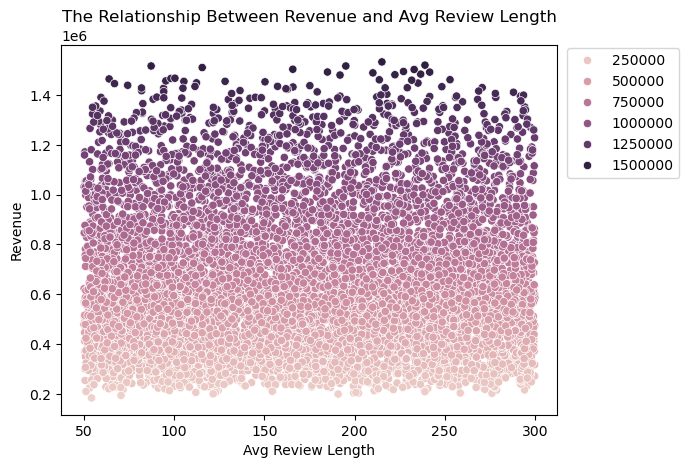

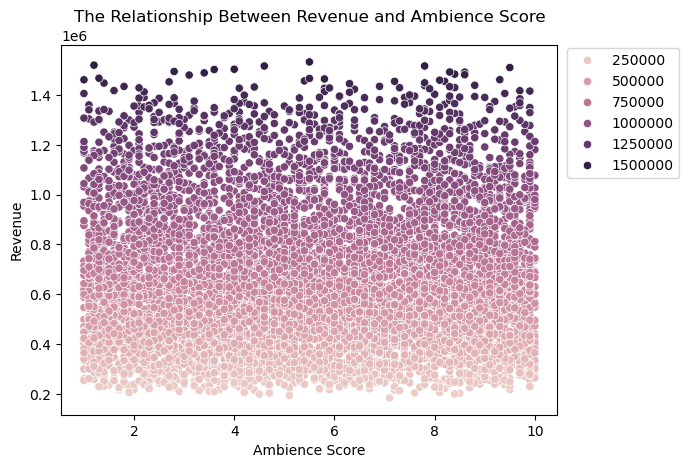

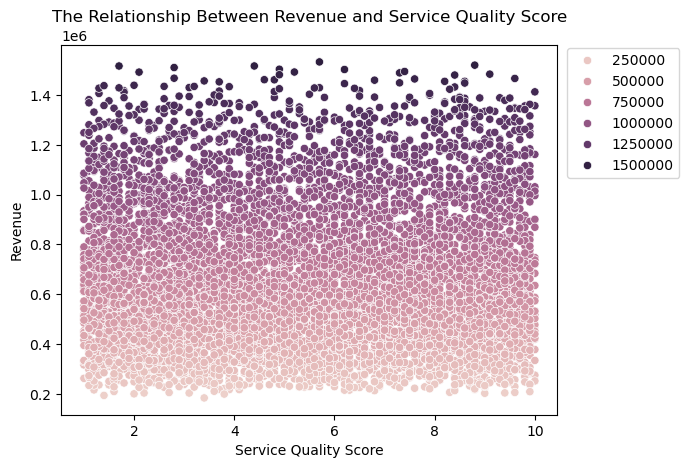

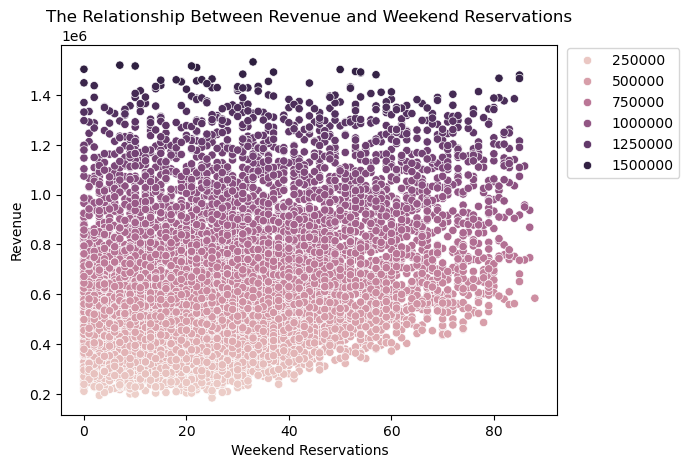

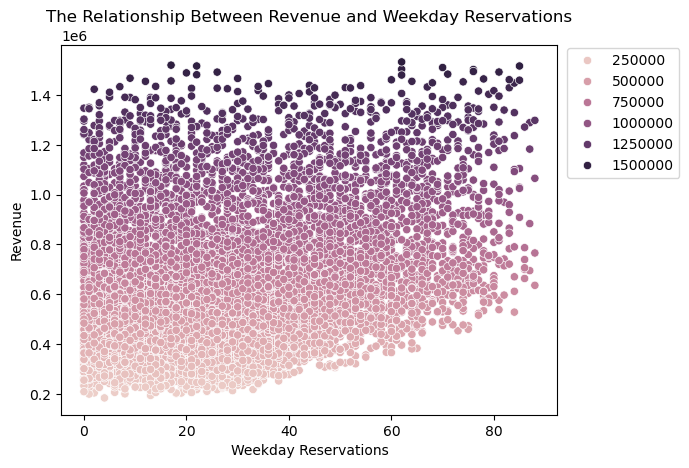

In [18]:
#Exploring the relationship between the numeric features and the target

for column in restaurant.drop("Revenue", axis = 1).select_dtypes("number").columns:
    sns.scatterplot(restaurant, x = column, y = "Revenue", hue = "Revenue").set(ylabel="Revenue")
    plt.title(f"The Relationship Between Revenue and {column}")
    plt.legend(bbox_to_anchor = (1.26,1.01))
    plt.show()

<Axes: >

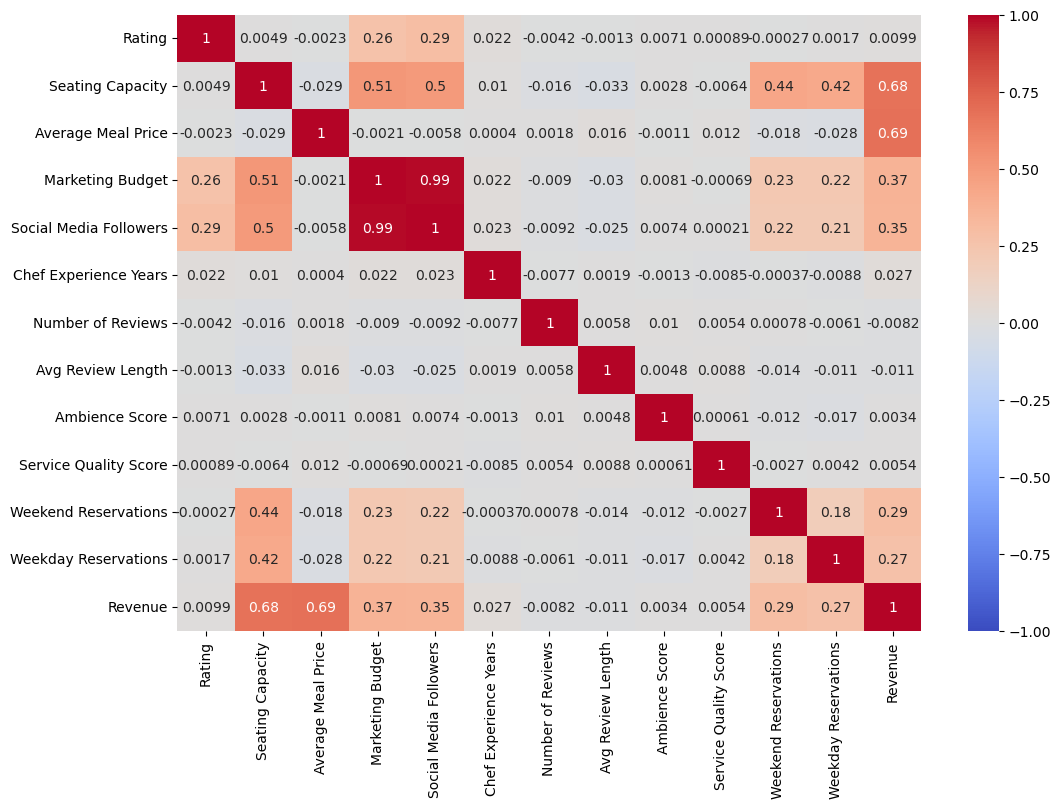

In [19]:
#Using heatmap to find relationship between numeric features and target

plt.figure(figsize=(12, 8))
sns.heatmap(restaurant.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")

As depicted in the heatmap, the factors which cause positive impacts on a restaurant revenue are seating capacity, average meal price, marketing budget, social media followers, and the volume of both weekend and weekday reservations. On the contrary, the remaining factors show no significant influence on the revenue. Additionally, the chart reveals that marketing budget and social median followers are extremely correlated. The multicollinearity between two factors should be further investigated as both may convey the same information about a restaurant's performance. The larger marketing budget a restaurant spends directly corresponds to the number of social media followers of the restaurant.

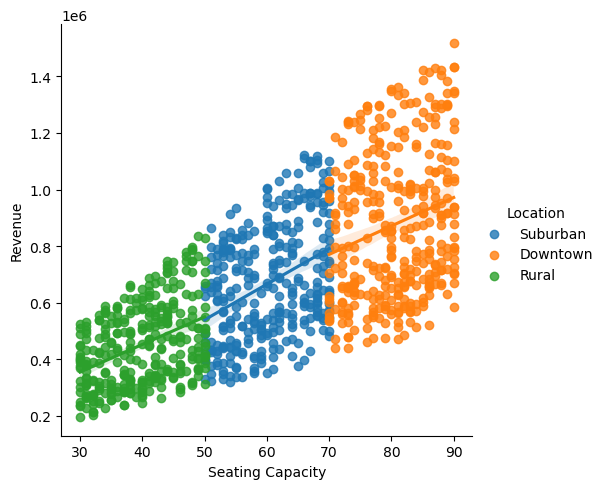

In [21]:
sns.lmplot(
    x="Seating Capacity", 
    y="Revenue", 
    hue = "Location",
    data=restaurant.sample(1000)
)

According to the chart, the more seating capacity a restaurant has, the more revenue it generates. More importantly, location may be a significant factor that strongly indicates the number of seating capacity units in each area. The rural location has a seating capacity of about 30-50 units, while the downtown and suburban areas have a seating capacity of about 50-70 and 70-90 units respectively. The regression line for each sublocation shows a positive relationship with revenue, with suburban being the strongest.

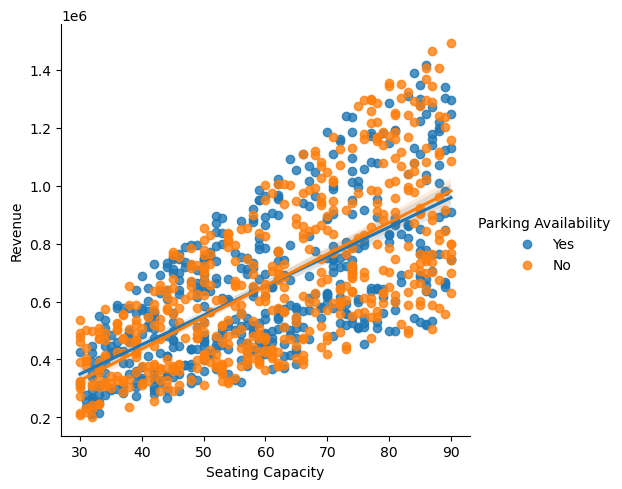

In [23]:
sns.lmplot(
    x="Seating Capacity", 
    y="Revenue", 
    hue = "Parking Availability",
    data=restaurant.sample(1000)
)

When it comes to parking availability, the chart demonstrates that the factor does not show relationship with the revenue. 

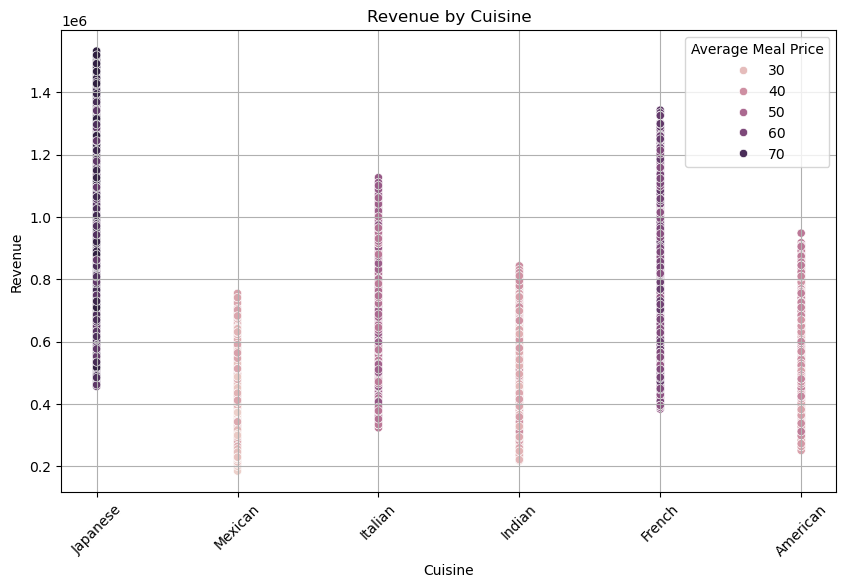

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Cuisine", y="Revenue", data=restaurant, hue = "Average Meal Price")
plt.title('Revenue by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

The chart illustrates that Japanese, French, and Italian cuisine are associated with the highest revenue figures compared to the other cuisine types presented. The factor also corresponds to the average meal price. Although some restaurants generate highest revnue and has high average meal price, some restaurants within these top-performing cuisine categories do not generate high revenue, suggesting the variability within these group. On the contrary, the Mexican and Indian cuisine have consistently average meal price and similar revenue. This can also be concluded that the cuisine is a significant factor associated with revenue.

## 5. Model Development and Evaluation

### 5.1 Feature Engineering

In [29]:
# Convert Parking Availability column into binary values by replacing 'Yes' with 1 and 'No' with 0

restaurant["Parking Availability"] = np.where(restaurant["Parking Availability"] == 'Yes', 1, 0)

# Drop 'Name' column
restaurant.drop('Name', axis = 1, inplace = True) 

restaurant.head()

Location   Cuisine  Rating  Seating Capacity  Average Meal Price  \
0     Rural  Japanese     4.0                38               73.98   
1  Downtown   Mexican     3.2                76               28.11   
2     Rural   Italian     4.7                48               48.29   
3     Rural   Italian     4.4                34               51.55   
4  Downtown  Japanese     4.9                88               75.98   

   Marketing Budget  Social Media Followers  Chef Experience Years  \
0              2224                   23406                     13   
1              4416                   42741                      8   
2              2796                   37285                     18   
3              1167                   15214                     13   
4              3639                   40171                      9   

   Number of Reviews  Avg Review Length  Ambience Score  \
0                185         161.924906             1.3   
1                533         148.759717             2.6   
2                853          56.849189             5.3   
3                 82         205.433265             4.6   
4                 78         241.681584             8.6   

   Service Quality Score  Parking Availability  Weekend Reservations  \
0                    7.0                     1                    13   
1                    3.4                     1                    48   
2                    6.7                     0                    27   
3                    2.8                     1                     9   
4                    2.1                     0                    37   

   Weekday Reservations     Revenue  
0                     4   638945.52  
1                     6   490207.83  
2                    14   541368.62  
3                    17   404556.80  
4                    26  1491046.35

In [30]:
# Convert categorical features into numeric columns by using pd.get_dummies

restaurant_transformed = pd.get_dummies(restaurant, drop_first=True, dtype=int)
restaurant_transformed.head()

Rating  Seating Capacity  Average Meal Price  Marketing Budget  \
0     4.0                38               73.98              2224   
1     3.2                76               28.11              4416   
2     4.7                48               48.29              2796   
3     4.4                34               51.55              1167   
4     4.9                88               75.98              3639   

   Social Media Followers  Chef Experience Years  Number of Reviews  \
0                   23406                     13                185   
1                   42741                      8                533   
2                   37285                     18                853   
3                   15214                     13                 82   
4                   40171                      9                 78   

   Avg Review Length  Ambience Score  Service Quality Score  ...  \
0         161.924906             1.3                    7.0  ...   
1         148.759717             2.6                    3.4  ...   
2          56.849189             5.3                    6.7  ...   
3         205.433265             4.6                    2.8  ...   
4         241.681584             8.6                    2.1  ...   

   Weekend Reservations  Weekday Reservations     Revenue  Location_Rural  \
0                    13                     4   638945.52               1   
1                    48                     6   490207.83               0   
2                    27                    14   541368.62               1   
3                     9                    17   404556.80               1   
4                    37                    26  1491046.35               0   

   Location_Suburban  Cuisine_French  Cuisine_Indian  Cuisine_Italian  \
0                  0               0               0                0   
1                  0               0               0                0   
2                  0               0               0                1   
3                  0               0               0                1   
4                  0               0               0                0   

   Cuisine_Japanese  Cuisine_Mexican  
0                 1                0  
1                 0                1  
2                 0                0  
3                 0                0  
4                 1                0  

[5 rows x 21 columns]

### 5.2 Data Splitting

In [32]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Prepare spliited data for statsmodels (adding constant)
X_sm = sm.add_constant(restaurant_transformed.drop("Revenue", axis = 1))
y_sm = restaurant_transformed["Revenue"]

# Test Split for statsmodels
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size=.2, random_state=12345)

#Prepare splitted data for scikit-learn models
X = restaurant_transformed.drop("Revenue", axis = 1)
y = restaurant_transformed["Revenue"]

# Test Split for scikit-learn models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345)

# checking the dimensions of the training and testing data
print(f"X_train:{X_train.shape} , X_test:{X_test.shape} y_train:{y_train.shape} , y_test:{y_test.shape}")

X_train:(6694, 20) , X_test:(1674, 20) y_train:(6694,) , y_test:(1674,)


Firstly, I decided to input all features to predict the target for observing the prediction performance and regression results.

### 5.3 Model Fitting

#### 5.3.1 Linear Regression (OLS Regression)

In [35]:
# Prepare X_train and X_test for statsmodels (adding constant)

import statsmodels.api as sm

sm_model = sm.OLS(y_sm_train, X_sm_train).fit()

sm_model.summary()

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Prepare spliited data for statsmodels (adding constant)
X_sm = sm.add_constant(restaurant_transformed.drop("Revenue", axis = 1))
y_sm = restaurant_transformed["Revenue"]

# Test Split for statsmodels
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size=.2, random_state=12345)


In [36]:
# Prepare X_train and X_test for statsmodels (adding constant)

import statsmodels.api as sm

sm_model_new = sm.OLS(y_sm_train, X_sm_train).fit()

sm_model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     7630.
Date:                Sun, 20 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:15:40   Log-Likelihood:                -82552.
No. Observations:                6694   AIC:                         1.651e+05
Df Residuals:                    6673   BIC:                         1.653e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -6.503e+05   1.37e+04    -47.392      0.000   -6.77e+05   -6.23e+05
Rating                  1495.1713   1247.776      1.198      0.231    -950.869    3941.211
Seating Capacity        1.066e+04    114.284     93.294      0.000    1.04e+04    1.09e+04
Average Meal Price      1.331e+04    212.756     62.565      0.000    1.29e+04    1.37e+04
Marketing Budget          -0.3902      2.390     -0.163      0.870      -5.076       4.296
Social Media Followers     0.2599      0.234      1.112      0.266      -0.198       0.718
Chef Experience Years    927.0504    122.380      7.575      0.000     687.146    1166.955
Number of Reviews          1.9911      2.428      0.820      0.412      -2.769       6.751
Avg Review Length         -2.4395      9.363     -0.261      0.794     -20.793      15.914
Ambience Score           178.3689    261.236      0.683      0.495    -333.737     690.475
Service Quality Score    220.6075    260.380      0.847      0.397    -289.820     731.035
Parking Availability   -1581.3674   1345.488     -1.175      0.240   -4218.953    1056.218
Weekend Reservations     -11.6763     37.223     -0.314      0.754     -84.645      61.292
Weekday Reservations      27.3393     36.931      0.740      0.459     -45.058      99.737
Location_Rural          3065.4329   4897.357      0.626      0.531   -6534.951    1.27e+04
Location_Suburban       3562.6435   3026.159      1.177      0.239   -2369.595    9494.882
Cuisine_French         -1004.9047   4855.020     -0.207      0.836   -1.05e+04    8512.485
Cuisine_Indian           672.5332   2586.919      0.260      0.795   -4398.655    5743.722
Cuisine_Italian         -262.0931   3114.258     -0.084      0.933   -6367.035    5842.848
Cuisine_Japanese       -6934.4288   6782.990     -1.022      0.307   -2.02e+04    6362.399
Cuisine_Mexican         1168.4456   3161.792      0.370      0.712   -5029.676    7366.568
==============================================================================
Omnibus:                       28.075   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.236
Skew:                           0.081   Prob(JB):                     3.68e-08
Kurtosis:                       3.311   Cond. No.                     9.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the OLS regression summary, the model has predictive power as the Prob (F-statistic) is 0.00. I can be confident that the model is better than the mean at predicting revenue given the standard threshold (P-value) at 0.05. However, there are many features with P>|t| greater than 0.05. This means that those features may not be good predictors of revenue. While the overall model is significant, some coefficient estimates are not in line with the F-Test. This suggests some of them are not statistically significant or exhibit multicolinearity issues.

In [38]:
#Check Variance Inflation Factor (VIF) of the features
def Check_VIF(feature):
    from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

    vif_data = pd.Series(
            [vif(feature.values, i) for i in range(feature.shape[1])],
            index=feature.columns)
    return vif_data

Check_VIF(X_sm)

const                     418.891949
Rating                      1.165464
Seating Capacity            8.848847
Average Meal Price         20.602995
Marketing Budget           42.198692
Social Media Followers     41.945070
Chef Experience Years       1.002568
Number of Reviews           1.001695
Avg Review Length           1.002863
Ambience Score              1.001811
Service Quality Score       1.001379
Parking Availability        1.001429
Weekend Reservations        1.237332
Weekday Reservations        1.214723
Location_Rural             11.866569
Location_Suburban           4.509321
Cuisine_French              7.411513
Cuisine_Indian              1.985238
Cuisine_Italian             3.039926
Cuisine_Japanese           13.796907
Cuisine_Mexican             3.060839
dtype: float64

Using Variance Inflation Factor (VIF), this can be concluded that there are many features causing multicolinearity problems (VIF value > 5). It means some features have similarity with other features and could potentially be excluded from the model to improve the reliability of coefficient estimates. Based on the results, the features such as Seating Capacity, Average Meal Price, Social Media Followers should be further investigated and properly addressed. 

In [40]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae

def evaluation_metric(model, X_train, X_test, y_train, y_test):
    from sklearn.metrics import r2_score as r2
    from sklearn.metrics import mean_absolute_error as mae
    from sklearn.metrics import mean_squared_error as rmse

    print(f"train R2: {r2(y_train, model.predict(X_train))}")
    print(f"train MAE: {mae(y_train, model.predict(X_train))}")
    print(f"RMSE: {rmse(y_train, model.predict(X_train), squared=False)}")

    print("                                             ")
    print(f"Test R2: {r2(y_test, model.predict(X_test))}")
    print(f"Test MAE: {mae(y_test, model.predict(X_test))}")
    print(f"RMSE: {rmse(y_test, model.predict(X_test), squared=False)}")

evaluation_metric(sm_model, X_sm_train, X_sm_test, y_sm_train, y_sm_test)

train R2: 0.9581051002486813
train MAE: 41719.789824919986
RMSE: 54905.18607007898
MSE: 3014579457.3899946
                                             
Test R2: 0.957873692356316
Test MAE: 40786.727461448136
RMSE: 54179.496510438046
MSE: 2935417842.1245685


C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


When it comes to the evaluation metrics, the model demonstrates a good fit as the train and test results are similar. The overall train results are slightly better compared to the test set but not considered overfitting because the R2 difference is only approximately 0.001, which is negligible. This means the model has generalized very well to unseen data.

Text(0, 0.5, 'Residuals')

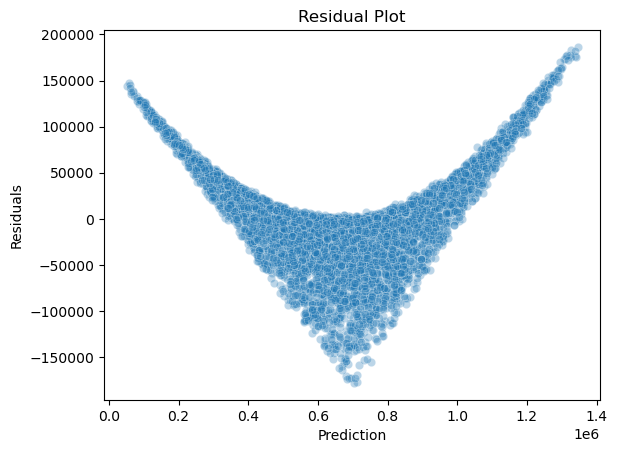

In [42]:
predictions = sm_model.predict()
residuals = sm_model.resid

sns.scatterplot(x=predictions, y=residuals, alpha=.3)
plt.title("Residual Plot")
plt.xlabel("Prediction")
plt.ylabel("Residuals")

The residual plot displays a U-shaped pattern, which means the linear model is not a proper choice for predicting revenue in this dataset. The model shows high fluctuation of errors as it provides good prediction for some values but fails to predict at the tails and the middle.

In [44]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

# fitting the model
model_lr.fit(X_train, y_train)

LinearRegression()

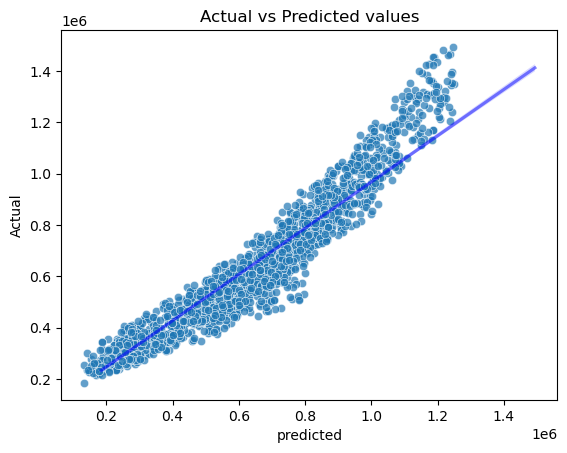

In [175]:
# Use linear regression model to predict values
y_lr_pred = model_lr.predict(X_test)

# Visualizing the actual vs predicted values
sns.scatterplot(x=y_lr_pred, y=y_test, alpha=0.7)
sns.regplot(x=y_test, y=y_lr_pred, scatter=False, color='blue', line_kws={'alpha':0.5}, label='Regression Line')

plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted values")
plt.show()


The chart indicates that the regression line does not provide a consistently good fit across the entire range of data points. Corresponding to the residual plot, the model shows over prediction at the extremes and under prediction at the middle of the line. This implies that nonlinear models may provide better fit to the scatter plot's data better. However, I decided to edit my input features to see if there is room to improve the linear regression model.

In [47]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

features = [
#            "Rating", 
#            "Seating Capacity", 
            "Average Meal Price", 
            "Marketing Budget", 
#            "Social Media Followers", 
#            "Chef Experience Years", 
#            "Number of Reviews",
#            "Avg Review Length",
#            "Ambience Score",
#            "Service Quality Score",
#           "Parking Availability",
            "Weekend Reservations", 
            "Weekday Reservations",
            "Location_Rural",
            "Location_Suburban",
            "Cuisine_French",
            "Cuisine_Indian",
            "Cuisine_Italian",
            "Cuisine_Japanese",
            "Cuisine_Mexican",
#            "Total Reservations"
]

# Prepare spliited data for statsmodels (adding constant)
X_sm = sm.add_constant(restaurant_transformed[features])
y_sm = restaurant_transformed["Revenue"]

# Test Split
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size=.2, random_state=12345)

#Prepare splitted data for scikit-learn models
X = restaurant_transformed[features]
y = restaurant_transformed["Revenue"]

# Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345)

In [48]:
# Prepare X_train and X_test for statsmodels (adding constant)

import statsmodels.api as sm

sm_model_new = sm.OLS(y_sm_train, X_sm_train).fit()

sm_model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     5649.
Date:                Sun, 20 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:15:40   Log-Likelihood:                -85366.
No. Observations:                6694   AIC:                         1.708e+05
Df Residuals:                    6682   BIC:                         1.708e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.778e+05   1.42e+04     12.538      0.000     1.5e+05    2.06e+05
Average Meal Price    1.338e+04    323.634     41.331      0.000    1.27e+04     1.4e+04
Marketing Budget         2.0384      0.714      2.857      0.004       0.640       3.437
Weekend Reservations   578.4978     55.787     10.370      0.000     469.138     687.857
Weekday Reservations   576.3853     55.433     10.398      0.000     467.719     685.051
Location_Rural       -4.012e+05   3382.390   -118.622      0.000   -4.08e+05   -3.95e+05
Location_Suburban    -1.998e+05   3118.520    -64.077      0.000   -2.06e+05   -1.94e+05
Cuisine_French       -5584.7727   7384.251     -0.756      0.449   -2.01e+04    8890.716
Cuisine_Indian         628.9093   3934.057      0.160      0.873   -7083.097    8340.916
Cuisine_Italian       -567.3011   4735.894     -0.120      0.905   -9851.164    8716.562
Cuisine_Japanese     -1.331e+04   1.03e+04     -1.290      0.197   -3.35e+04    6919.830
Cuisine_Mexican      -3398.8415   4807.386     -0.707      0.480   -1.28e+04    6025.170
==============================================================================
Omnibus:                        6.604   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                7.126
Skew:                           0.034   Prob(JB):                       0.0284
Kurtosis:                       3.144   Cond. No.                     6.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the new OLS regression summary, the model still has the same the Prob (F-statistic) value which is 0.00. More importantly, most features with P>|t| greater than 0.05 are related to cuisine nationality in this edited version of model. Such features may be considered not significant to the model. However, the strong association between cuisine and revenue are cleary presented in the object feature-target chart in previous section. Therefore, removing the cuisine-related features may not be an optimal option.

In [50]:
Check_VIF(X_sm)

const                   192.323778
Average Meal Price       20.592746
Marketing Budget          1.634318
Weekend Reservations      1.203848
Weekday Reservations      1.184013
Location_Rural            2.450034
Location_Suburban         2.073502
Cuisine_French            7.406913
Cuisine_Indian            1.983440
Cuisine_Italian           3.036530
Cuisine_Japanese         13.789296
Cuisine_Mexican           3.058341
dtype: float64

Checking on the VIF values, there are 2 features, which are Average Meal Price, Cuisine_Japanese, and Cuisine_French, that show high multicollinearity. However, the features should not be removed due to a stronger correlation with the revenue (as shown in the EDA section). 

In [52]:
evaluation_metric(sm_model_new, X_sm_train, X_sm_test, y_sm_train, y_sm_test) 

train R2: 0.9029025979676275
train MAE: 66846.58144569412
RMSE: 83586.58745365276
MSE: 6986717602.14714
                                             
Test R2: 0.9040307220313587
Test MAE: 65035.35143518601
RMSE: 81775.72082864842
MSE: 6687268517.045043


C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


For the metric evaluation after changing feature input, the overall performance of the model has become poorer. The R-squaured value is lowered by approximately 0.05 while the RMSE and MAE are higher for about 30000 and 20000 respectively for both train and test data. 

Text(0, 0.5, 'Residuals')

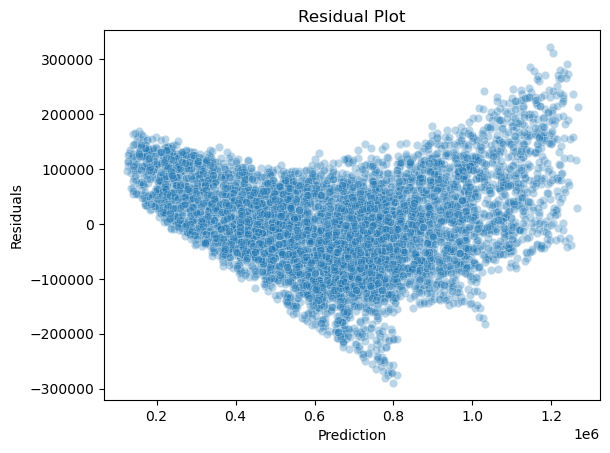

In [54]:
predictions = sm_model_new.predict()
residuals = sm_model_new.resid

sns.scatterplot(x=predictions, y=residuals, alpha=.3)
plt.title("Residual Plot")
plt.xlabel("Prediction")
plt.ylabel("Residuals")

Based on the residual plot, the fluctuation of the residues is clearly reduced and has a slighter U-shaped pattern compared to the previous version of the linear regression models. However, there are some outliers 

In [56]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

# fitting the model
model_lr.fit(X_train, y_train)

LinearRegression()

In [57]:
# Use linear regression model to predict values
y_lr_pred = model_lr.predict(X_test)

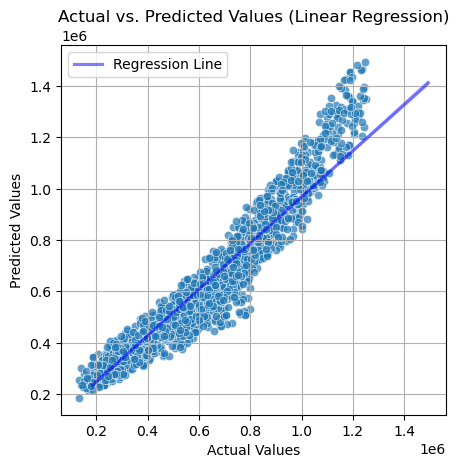

In [58]:
# Visualizing the actual vs predicted values
sns.scatterplot(x=y_lr_pred, y=y_test, alpha=0.7)
sns.regplot(x=y_test, y=y_lr_pred, scatter=False, color='blue', line_kws={'alpha':0.5}, label='Regression Line')

plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box') # Make sure axes are scaled equally
plt.show()

Compared to the previous version of Actual vs Predicted chart, the new version shows better fit to the data points around the diagonal line. This may indicate the better accuracy of the target prediction. However, for the restaurants that generate high revenue, the model may still provide under-prediction at the highest end of the line. After the feature engineering by removing low-correlation features, this model is successfully improved as it captures the significant relationship between features, making it more well-generalized for prediction.

#### 5.3.2 Ridge Regression

Since some features in OLM model still have high VIF value after feature engineering, Ridge and Lasso algorithms may be the better option due to complexity penalty added to the model to shrink coefficients. While contraining the magnitude of the coefficients to prevent overfitting, the ridge regression tends to produce more accurate models when working with highly correlated features that lead to unstable parameter estimates.

In [62]:
from sklearn.preprocessing import StandardScaler

#standardize train data to get all features on the same unit scale for equal comparison during regularization
std = StandardScaler()
X_sm_train_scaled = std.fit_transform(X_sm_train.values)
X_sm_test_scaled = std.transform(X_sm_test.values)

In [63]:
from sklearn.linear_model import Ridge

#Fit the ridge model
ridge_model = Ridge(alpha=1).fit(X_sm_train_scaled, y_train)

# Check the standardized value of each observation
pd.DataFrame(X_sm_train_scaled, columns=X_sm_train.columns)

const  Average Meal Price  Marketing Budget  Weekend Reservations  \
0       0.0           -0.264583          0.382899             -1.022662   
1       0.0           -0.757533         -0.789756             -1.272322   
2       0.0            1.470152         -0.336461             -0.673140   
3       0.0           -0.850266         -1.024069             -0.523344   
4       0.0           -0.941604         -0.351790             -0.972731   
...     ...                 ...               ...                   ...   
6689    0.0           -0.439591          0.251509              0.225633   
6690    0.0           -1.563543          0.436003              0.724951   
6691    0.0           -1.118006         -0.614570              0.225633   
6692    0.0           -1.575396         -0.142113             -0.323617   
6693    0.0            1.915689         -1.071150             -0.423481   

      Weekday Reservations  Location_Rural  Location_Suburban  Cuisine_French  \
0                -0.008838        1.413897          -0.701094        -0.45688   
1                 0.239540       -0.707265           1.426342        -0.45688   
2                 1.183378       -0.707265           1.426342        -0.45688   
3                 0.090513        1.413897          -0.701094        -0.45688   
4                -1.300405        1.413897          -0.701094        -0.45688   
...                    ...             ...                ...             ...   
6689             -0.058514       -0.707265           1.426342        -0.45688   
6690             -0.306892        1.413897          -0.701094        -0.45688   
6691             -0.952676       -0.707265          -0.701094        -0.45688   
6692              1.183378       -0.707265           1.426342        -0.45688   
6693             -0.306892        1.413897          -0.701094        -0.45688   

      Cuisine_Indian  Cuisine_Italian  Cuisine_Japanese  Cuisine_Mexican  
0          -0.433269        -0.453532         -0.435455        -0.453053  
1           2.308036        -0.453532         -0.435455        -0.453053  
2          -0.433269        -0.453532          2.296446        -0.453053  
3          -0.433269        -0.453532         -0.435455        -0.453053  
4          -0.433269        -0.453532         -0.435455         2.207245  
...              ...              ...               ...              ...  
6689       -0.433269        -0.453532         -0.435455        -0.453053  
6690       -0.433269        -0.453532         -0.435455         2.207245  
6691        2.308036        -0.453532         -0.435455        -0.453053  
6692       -0.433269        -0.453532         -0.435455         2.207245  
6693       -0.433269        -0.453532          2.296446        -0.453053  

[6694 rows x 12 columns]

In [64]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error as mae

n_alphas = 200
alphas = 10 ** np.linspace(-3, 3, n_alphas)

## find the best alpha (regularization strength) for the model
ridge_model = RidgeCV(alphas=alphas, cv=5)

ridge_model.fit(X_sm_train_scaled, y_train)


print(f"Train R2: {ridge_model.score(X_sm_train_scaled, y_train)}")
print(f"Train mae: {mae(y_train, ridge_model.predict(X_sm_train_scaled))}")
print(f"Train alpha: {ridge_model.alpha_}")

Train R2: 0.9029023625631022
Train mae: 66843.09857011368
Train alpha: 0.9011018251665018


In [65]:
## Ridge test core evaluation
print(f"Test R2: {ridge_model.score(X_sm_test_scaled, y_sm_test)}")
print(f"Test mae: {mae(y_test, ridge_model.predict(X_sm_test_scaled))}")
print(f"Test alpha: {ridge_model.alpha_}")

Test R2: 0.9040313887274252
Test mae: 65029.37029789787
Test alpha: 0.9011018251665018


train R2: 0.9029023625631022
train MAE: 66843.09857011368
RMSE: 83586.68877793438
MSE: 6986734540.8592615
                                             
Test R2: 0.9040313887274252
Test MAE: 65029.37029789787
RMSE: 81775.43678125713
MSE: 6687222060.765381


C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


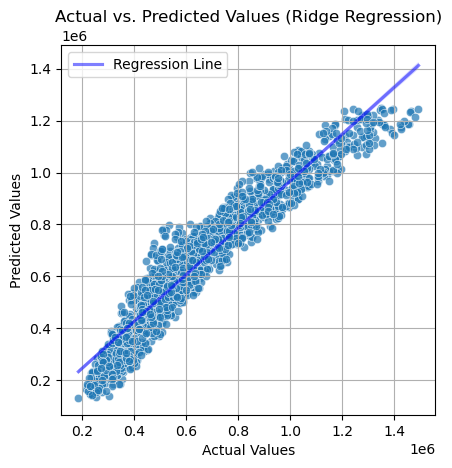

In [66]:
from sklearn.metrics import r2_score as r2

ridge_model = Ridge(alpha = 0.9011018251665018).fit(X_sm_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_sm_test_scaled)

evaluation_metric(ridge_model, X_sm_train_scaled, X_sm_test_scaled, y_sm_train, y_sm_test) 

# Visualizing the actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.7)
sns.regplot(x=y_test, y=y_pred_ridge, scatter=False, color='blue', line_kws={'alpha':0.5}, label='Regression Line')

plt.title('Actual vs. Predicted Values (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box') # Make sure axes are scaled equally
plt.show()

After applying the ridge regression algorithm, the R-squared value of the ridge model (0.904) shows no significant difference from the linear regression's one (0.904). It can be concluded that the data does not have many highly collinear features. The regularization does not benefit much in this case. This strongly suggests that severe multicollinearity was not a primary issue impacting the predictive power of your original linear regression model.

When it comes to the chart, it indicates under-prediction at the very lowest end of the range and slight over-prediction at some points of the line. This means the model is quiet well-generalized for prediction.

#### 5.3.3 Lasso Regression

Apart from the ridge regression algorithm, Lasso regression is another one that can add a regularization term. It can shrinks the coefficients towards or drop to 0 depending on the strength of alpha, which will penalizes non-significant features in the model.

In [70]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=50).fit(X_sm_train_scaled, y_train) #increase alpha to drop vars

list(zip(X.columns, lasso_model.coef_))

[('Average Meal Price', 0.0),
 ('Marketing Budget', 189880.46974287697),
 ('Weekend Reservations', 3739.2389333463643),
 ('Weekday Reservations', 11567.3473161013),
 ('Location_Rural', 11593.799544445676),
 ('Location_Suburban', -189060.35682472913),
 ('Cuisine_French', -93826.07186441861),
 ('Cuisine_Indian', -973.923733493815),
 ('Cuisine_Italian', 0.0),
 ('Cuisine_Japanese', 305.93001574336705),
 ('Cuisine_Mexican', -3278.0752565838316)]

In [71]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = 10 ** np.linspace(-3, 3, n_alphas)

## find the best alpha (regularization strength) for the model
lasso_model = LassoCV(alphas=alphas, cv=5)

lasso_model.fit(X_sm_train_scaled, y_train)


print(f"Train R2: {lasso_model.score(X_sm_train_scaled, y_train)}")
print(f"Train mae: {mae(y_train, lasso_model.predict(X_sm_train_scaled))}")
print(f"Train alpha: {lasso_model.alpha_}")

Train R2: 0.9028533544790615
Train mae: 66780.82855063064
Train alpha: 499.450511585514


In [72]:
## Ridge test core evaluation
print(f"Test R2: {ridge_model.score(X_sm_test_scaled, y_sm_test)}")
print(f"Test mae: {mae(y_test, ridge_model.predict(X_sm_test_scaled))}")
print(f"Test alpha: {lasso_model.alpha_}")

Test R2: 0.9040313887274252
Test mae: 65029.37029789787
Test alpha: 499.450511585514


In [73]:
list(zip(X.columns, lasso_model.coef_))

[('Average Meal Price', 0.0),
 ('Marketing Budget', 186217.309400028),
 ('Weekend Reservations', 3926.6393191756724),
 ('Weekday Reservations', 11410.834577644779),
 ('Location_Rural', 11451.578525142533),
 ('Location_Suburban', -188189.91529422),
 ('Cuisine_French', -92901.58888554666),
 ('Cuisine_Indian', 679.8208780590379),
 ('Cuisine_Italian', -0.0),
 ('Cuisine_Japanese', 1040.5241063580868),
 ('Cuisine_Mexican', -0.0)]

train R2: 0.9028533544790615
train MAE: 66780.82855063064
RMSE: 83607.78046878266
MSE: 6990260954.916155
                                             
Test R2: 0.9040609821708805
Test MAE: 64910.86125163446
RMSE: 81762.82743261837
MSE: 6685159949.776131


C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


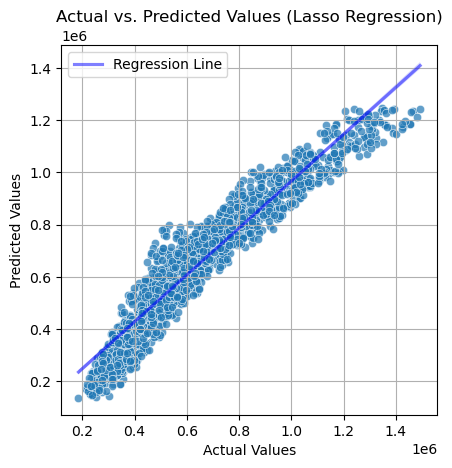

In [74]:
from sklearn.metrics import r2_score as r2

lasso_model = Lasso(alpha = 499.450511585514).fit(X_sm_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_sm_test_scaled)

evaluation_metric(lasso_model, X_sm_train_scaled, X_sm_test_scaled, y_sm_train, y_sm_test) 

# Visualizing the actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.7)
sns.regplot(x=y_test, y=y_pred_lasso, scatter=False, color='blue', line_kws={'alpha':0.5}, label='Regression Line')

plt.title('Actual vs. Predicted Values (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box') # Make sure axes are scaled equally
plt.show()

The lasso model shows similar value to the ridge regression in terms of both R-squared, RMSE, and chart, as a result, it indicates the same conclusion as the ridge model suggests, which is multicollinearity does not affect the model.

#### 5.3.4 Random Forest Regressor

After analyzing the charts of the linear models, it is evident that a simple linear model is not well-suited for this dataset, suggesting that a non-linear model may yield better accuracy. Therefore, to achieve optimal results, tree-based algorithms were taken into consideration. While they excel at predictive accuracy, this often comes at the cost of compromised interpretability. In this context, the Random Forest Regressor is preferred over a single Decision Tree because it uses an ensemble of trees, each built from a random sample of observations and features. This process effectively prevents overfitting and yields better overall accuracy.

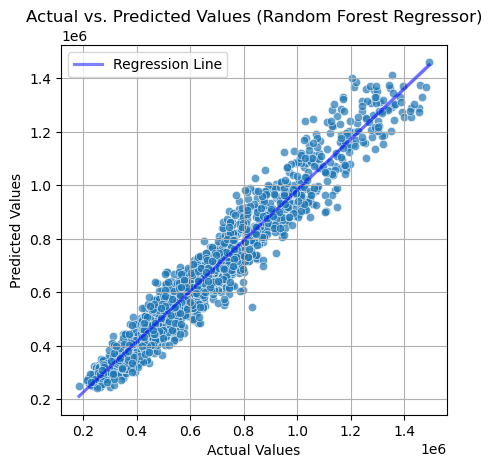

train R2: 0.9917262015268666
train MAE: 19285.728435912763
RMSE: 24399.743402091208
MSE: 595347478.0878935
                                             
Test R2: 0.9396611884736608
Test MAE: 51416.34583632019
RMSE: 64842.03603264705
MSE: 4204489636.859098


C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [77]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor baseline model
rfr = RandomForestRegressor(random_state=2025)
rfr_model = rfr.fit(X_train, y_train)
y_pred_rfr = rfr_model.predict(X_test)

# Visualizing the actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred_rfr, alpha=0.7)
sns.regplot(x=y_test, y=y_pred_rfr, scatter=False, color='blue', line_kws={'alpha':0.5}, label='Regression Line')

plt.title('Actual vs. Predicted Values (Random Forest Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box') # Make sure axes are scaled equally
plt.show()

#Evaluation
evaluation_metric(rfr_model, X_train, X_test, y_train, y_test)

The evaluation metrics show an extremely high R-squared value for the training data and a significant drop for the test data set, suggesting overfitting. This can be expected since the tree-based algorithms are prone to overfitting especially if we don’t
tune hyperparameters. Thus, the hyperparameter tuning is required to solve the overfitting issue.

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

## find the best parameters that yield heighest precision
params = {
    'n_estimators': np.arange(start=100, stop=300, step=100), #Control the total number of trees in the forest,
    'max_features': [None, "sqrt"], #Set the number of features to consider at each split,
    'bootstrap': [True, False], #Toggle ramdom sampling ON and OFF,
    'max_samples': [None, .3, .5, .9], #Set the number of rows used for training each tree,
    'max_depth': np.arange(start=1, stop=11, step=1), #Limits the longest possible path,
    'min_samples_leaf': [2, 5, 10, 20, 100], #Set a minimum number of observations,
}

grid = RandomizedSearchCV(
    rfr, 
    params,
    n_iter=100
)

grid.fit(X_train, y_train)


grid.best_params_

C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 433, in fit
    raise ValueErr

{'n_estimators': 100,
 'min_samples_leaf': 2,
 'max_samples': None,
 'max_features': None,
 'max_depth': 8,
 'bootstrap': True}

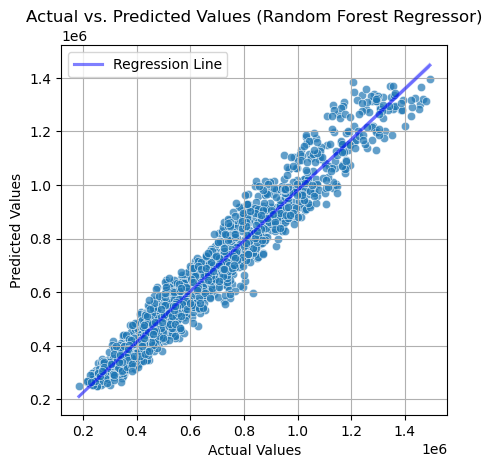

train R2: 0.9552081659993831
train MAE: 46212.14157597177
RMSE: 56771.74094806702
MSE: 3223030570.2744293
                                             
Test R2: 0.9442980692562936
Test MAE: 50289.060317831136
RMSE: 62300.76676973377
MSE: 3881385540.096763


C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [80]:
# best parameters
params = {
    'n_estimators': 200,
     'min_samples_leaf': 5,
     'max_samples': 0.3,
     'max_features': None,
     'max_depth': 9,
     'bootstrap': True
}

#Create a tuned Random Forest baseline model

rfr = RandomForestRegressor(random_state=2025, **params)
rfr_model = rfr.fit(X_train, y_train)
y_pred_rfr = rfr_model.predict(X_test)

# Visualizing the actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred_rfr, alpha=0.7)
sns.regplot(x=y_test, y=y_pred_rfr, scatter=False, color='blue', line_kws={'alpha':0.5}, label='Regression Line')

plt.title('Actual vs. Predicted Values (Random Forest Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box') # Make sure axes are scaled equally
plt.show()

#Evaluation
evaluation_metric(rfr_model, X_train, X_test, y_train, y_test)

After the parameter tuning is performed, the model highlights the better fit as the R-squared of training data is not very close to 1 and the gap between the test and training values is minimized. This suggests that the model is well-generalized and has successfully avoided overfitting.

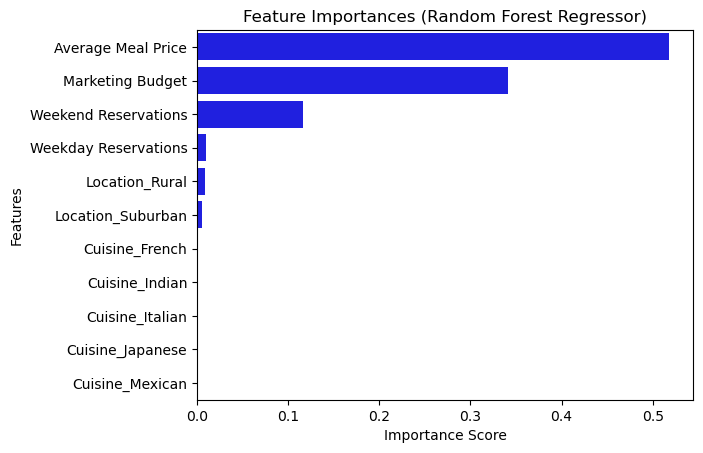

In [82]:
sns.barplot(x=sorted(rfr_model.feature_importances_)[::-1], y = X.columns, color = "blue")
plt.title('Feature Importances (Random Forest Regressor)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Looking at the feature importance chart, the features namely Average Meal Price, Location_Rural, Location_Suburban are the significant contributors to the model. While the Marketing Budget, Weekend and Weekday Reservations features show small importance, the cuisine nationality features are considered not useful to predict the revenue of restaurants for this model's context but should not be removed due to a stronger correlation with the revenue (as shown in EDA section).

#### 5.3.5 Gradient Boosting Regressor



Another tree-based algorithm that is very powerful algorithm as it fits a series of decision trees and uses weight averages to correct the mistakes of prior models, making it resilience to overfitting.

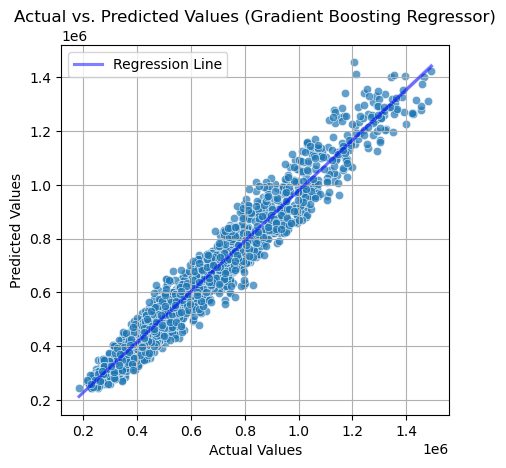

train R2: 0.9498980627947756
train MAE: 48570.604167347374
RMSE: 60042.677284017016
MSE: 3605123095.4326134
                                             
Test R2: 0.9457378024855609
Test MAE: 49434.33906912599
RMSE: 61490.34875488387
MSE: 3781062989.9972477


C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [85]:
from sklearn.ensemble import GradientBoostingRegressor

#Create a GBM baseline model
gbm = GradientBoostingRegressor(random_state=2025)

gbm_model = gbm.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)

# Visualizing the actual vs predicted values of the baseline GBM model
sns.scatterplot(x=y_test, y=y_pred_gbm, alpha=0.7)
sns.regplot(x=y_test, y=y_pred_gbm, scatter=False, color='blue', line_kws={'alpha':0.5}, label='Regression Line')

plt.title('Actual vs. Predicted Values (Gradient Boosting Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box') # Make sure axes are scaled equally
plt.show()

#Evaluation
evaluation_metric(gbm_model, X_train, X_test, y_train, y_test)

Analyzing the evaluation metrics, the GBM baseline model demonstrates an excellent fit, as there is only a small gap in the R-squared values between the training and test data (0.9499 and 0.9457). The line chart also shows that the data points are clustered closely around the line. Undoubtedly, this model shows excellent performance and is well-generalized. This raises the question of whether there is any room for further accuracy improvement through parameter tuning.

In [87]:
import numpy as np

from sklearn.model_selection import RandomizedSearchCV
      
gbm = GradientBoostingRegressor(random_state=2025)

#Find the best parameter for GBM model

params = {
    'n_estimators': [20, 40, 60, 80, 100, 200],
    'learning_rate': [.1, .2, .3],
    'max_features': [None, "sqrt"],
    'subsample': [.8, .9, .95],
    'max_depth': np.arange(start=3, stop=12, step=2),
    'min_samples_leaf': [2, 5, 10]    
}

grid = RandomizedSearchCV(
    gbm, 
    params,
    n_iter=100
)

grid.fit(X_train, y_train)

grid.best_params_

{'subsample': 0.9,
 'n_estimators': 60,
 'min_samples_leaf': 5,
 'max_features': None,
 'max_depth': 5,
 'learning_rate': 0.1}

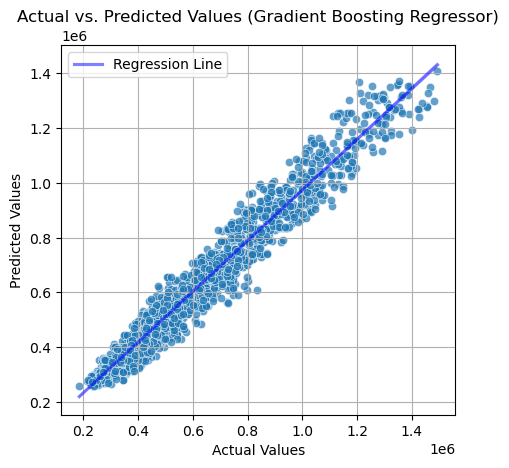

train R2: 0.9530614416218401
train MAE: 46982.69273648374
RMSE: 58116.26071750619
MSE: 3377499759.785154
                                             
Test R2: 0.9463824835103276
Test MAE: 48996.048620039415
RMSE: 61123.97850345787
MSE: 3736140748.09118


C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [88]:
from sklearn.ensemble import GradientBoostingRegressor

#Best parameter for GBM model
params = {
    'subsample': 0.8,
    'n_estimators': 40,
    'min_samples_leaf': 5,
    'max_features': None,
    'max_depth': 5,
    'learning_rate': 0.1}

#Create a tuned GBM model

gbm = GradientBoostingRegressor(random_state=2025, **params)

gbm_model = gbm.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)

# Visualizing the actual vs predicted values of the tuned GBM model
sns.scatterplot(x=y_test, y=y_pred_gbm, alpha=0.7)
sns.regplot(x=y_test, y=y_pred_gbm, scatter=False, color='blue', line_kws={'alpha':0.5}, label='Regression Line')

plt.title('Actual vs. Predicted Values (Gradient Boosting Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box') # Make sure axes are scaled equally
plt.show()

#Evaluation
evaluation_metric(gbm_model, X_train, X_test, y_train, y_test)

After tuning the model, the R-squared values of the traning and test data are slightly improved compared to the baseline version (0.953 and 0.946) but the gap is slightly widened. Eventhough the tuned model shows more complex process, this can be concluded the predictive power yields more positive value and can be concluded that the model is highly effective and well-generalized.

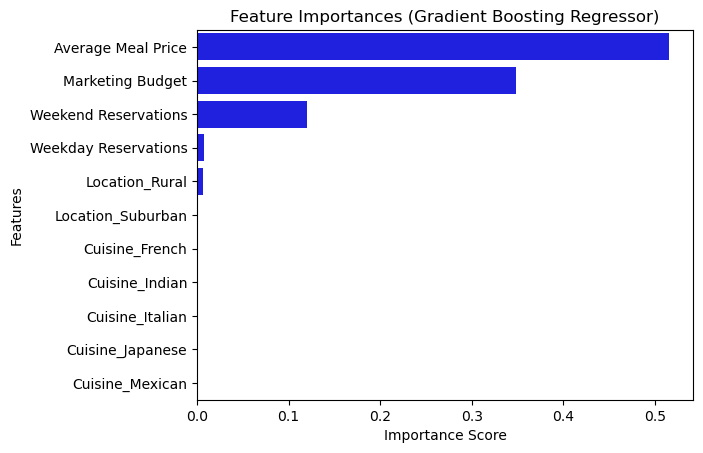

In [90]:
## Checking feature importance
sns.barplot(x=sorted(gbm_model.feature_importances_)[::-1], y = X.columns, color = "blue")
plt.title('Feature Importances (Gradient Boosting Regressor)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

This feature importance chart of this model also yields the similar results to the Random Forest Regressor one. This can be concluded that the tree-based model may use similar process to predict the result.

## 6. Conclusion

After applying 5 models to predict the revenue of the restaurant, the results can be concluded as follows:

In terms of predictive accuracy, the Gradient Boosting Regressor is the most well-generalized and has the most powerful predictive power. The model achieves approximately 94.6% accuracy in explaining the variance in revenue, with average predictive errors of 48,996 dollars and RMSE of 61123 dollars (there are some larger individual errors in predictions). Therefore, the Gradient Boosting Regressor is the optimal choice for prediction.

On the contrary, the Linear Regression (OLS) model is preferred for its interpretability, as it can be explained in statistics to show how each feature plays a role in predictive power and its coefficients provide direct and easily understandable insights into the individual impact (magnitude and direction) of each feature on the revenue.